# Лабораторная работа №4

## Вариант 10
## Регрессия
### Данные:
Датасет – x10.csv

На химическом заводе по окислению аммиака в азотную кислоту измерения проводились каждый день. Имеется 21 строка данных.

Атрибуты:

• I – индекс;

• A1 – время работы,

• A2 – температура охлаждающей жидкости,

• A3 – концентрация преобразованной кислоты.

• B – процентное содержание необработанного аммиака.


## Задание 1: Загрузить набор данных как датафрейм библиотеки pandas. Использовать набор данных для задания 4.

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as pt
%matplotlib inline

df = pd.read_csv('x10.csv')

## Задание 2: Получить представлении о наборе данных с помощью методов shape, head, describe, info библиотеки pandas.

In [4]:
df.shape

(21, 5)

In [5]:
df.head()

,Number,OperationTime,CoolantTemperature,TransformedAcidConcentration,UnprocessedPercentage
0,1,80,27,89,42
1,2,80,27,88,37
2,3,75,25,90,37
3,4,62,24,87,28
4,5,62,22,87,18


In [6]:
df.describe()

,Number,OperationTime,CoolantTemperature,TransformedAcidConcentration,UnprocessedPercentage
count,21.000000,21.000000,21.000000,21.000000,21.000000
mean,11.000000,60.428571,21.095238,86.285714,17.523810
std,6.204837,9.168268,3.160771,5.358571,10.171623
min,1.000000,50.000000,17.000000,72.000000,7.000000
25%,6.000000,56.000000,18.000000,82.000000,11.000000
50%,11.000000,58.000000,20.000000,87.000000,15.000000
75%,16.000000,62.000000,24.000000,89.000000,19.000000
max,21.000000,80.000000,27.000000,93.000000,42.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Number                        21 non-null     int64
 1   OperationTime                 21 non-null     int64
 2   CoolantTemperature            21 non-null     int64
 3   TransformedAcidConcentration  21 non-null     int64
 4   UnprocessedPercentage         21 non-null     int64
dtypes: int64(5)
memory usage: 972.0 bytes


## Задание 3. Произвести разведочный анализ данных по датасету – визуализировать данные с помощью библиотек matplotlib, seaborn.


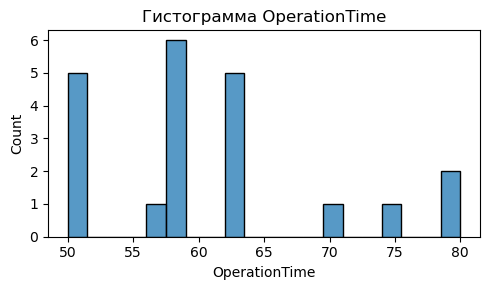

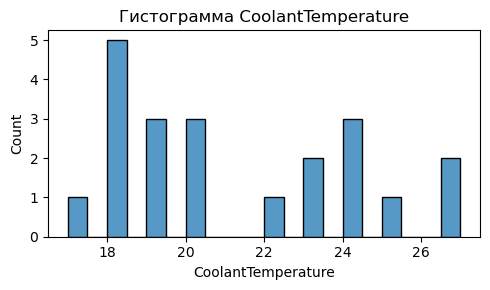

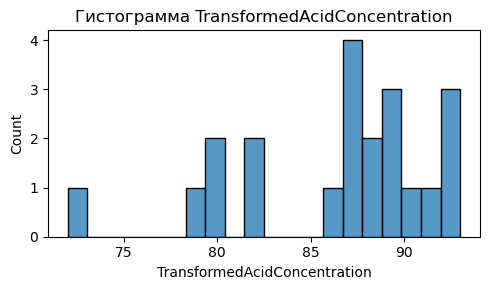

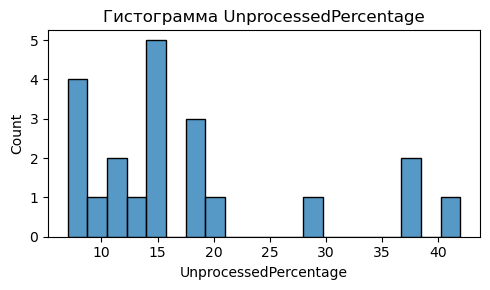

In [14]:
num_cols = ['OperationTime', 'CoolantTemperature', 'TransformedAcidConcentration', 'UnprocessedPercentage']

for col in num_cols:
    pt.figure(figsize=(5,3))
    sns.histplot(df[col], bins=20)
    pt.title(f'Гистограмма {col}')
    pt.tight_layout()
    pt.show()

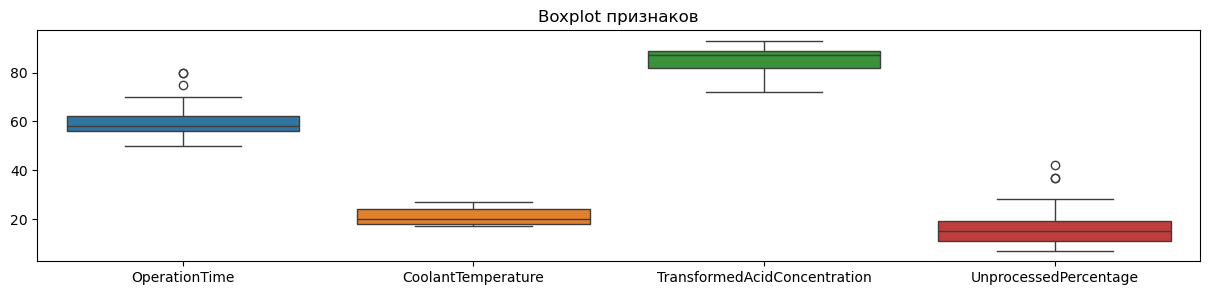

In [17]:
pt.figure(figsize=(15,3))
sns.boxplot(data=df[num_cols])
pt.title('Boxplot признаков')
pt.show()

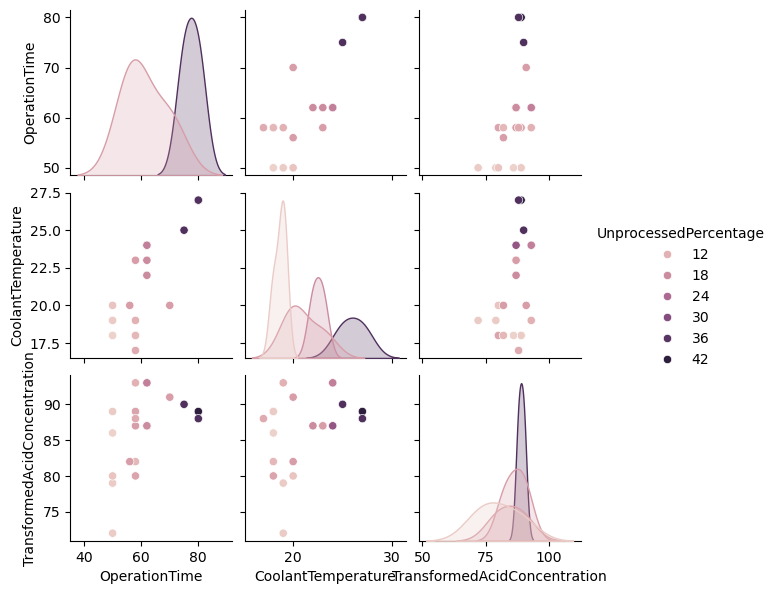

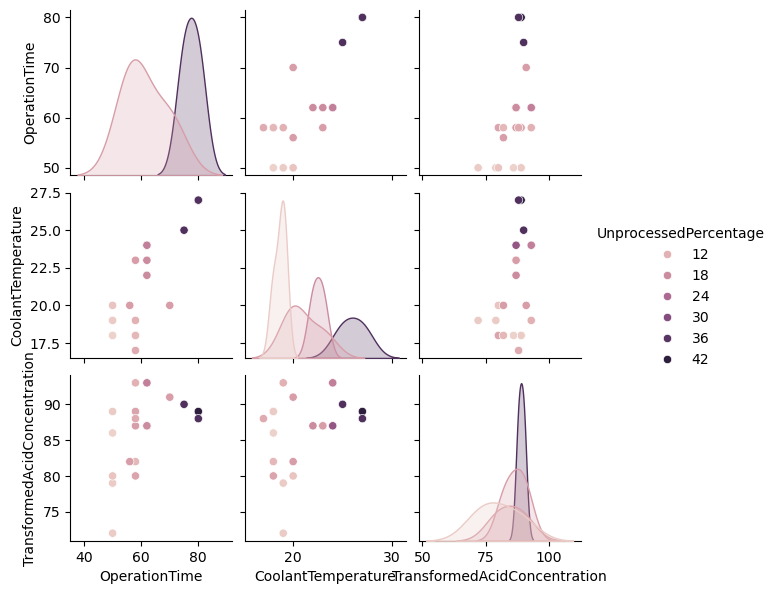

In [21]:
sns.pairplot(df[num_cols], hue='UnprocessedPercentage', height=2)
pt.show()

## Задание 4 На основе выполненного анализа данных произвести выводы о влиянии различных признаков на класс.

In [22]:
corr_target = df[num_cols].corr()['UnprocessedPercentage'].sort_values(ascending=False)
corr_target

UnprocessedPercentage           1.000000
OperationTime                   0.919663
CoolantTemperature              0.875504
TransformedAcidConcentration    0.399830
Name: UnprocessedPercentage, dtype: float64

Больше всего влияет OperationTime, меньше всего влияет TransformedAcidConcentration

## Задание 5: Произвести предобработку данных

In [25]:
df_copy = df.copy()
print(df_copy.isnull().sum())

Number                          0
OperationTime                   0
CoolantTemperature              0
TransformedAcidConcentration    0
UnprocessedPercentage           0
dtype: int64


In [26]:
y = df_copy['UnprocessedPercentage']
x = df_copy.drop(['UnprocessedPercentage'], axis=1)
y


0     42
1     37
2     37
3     28
4     18
5     18
6     19
7     20
8     15
9     14
10    14
11    13
12    11
13    12
14     8
15     7
16     8
17     8
18     9
19    15
20    15
Name: UnprocessedPercentage, dtype: int64

In [27]:

from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()
x = standardizer.fit_transform(x)
x

array([[-1.65144565,  2.18740835,  1.91427332,  0.51904045],
       [-1.48630108,  2.18740835,  1.91427332,  0.32781502],
       [-1.32115652,  1.6285814 ,  1.26589042,  0.71026587],
       [-1.15601195,  0.17563133,  0.94169897,  0.13658959],
       [-0.99086739,  0.17563133,  0.29331607,  0.13658959],
       [-0.82572282,  0.17563133,  0.61750752,  0.13658959],
       [-0.66057826,  0.17563133,  0.94169897,  1.28394216],
       [-0.49543369,  0.17563133,  0.94169897,  1.28394216],
       [-0.33028913, -0.27143023,  0.61750752,  0.13658959],
       [-0.16514456, -0.27143023, -1.00344972, -1.2019884 ],
       [ 0.        , -0.27143023, -1.00344972,  0.51904045],
       [ 0.16514456, -0.27143023, -1.32764117,  0.32781502],
       [ 0.33028913, -0.27143023, -1.00344972, -0.81953755],
       [ 0.49543369, -0.27143023, -0.67925827,  1.28394216],
       [ 0.66057826, -1.16555335, -1.00344972,  0.51904045],
       [ 0.82572282, -1.16555335, -1.00344972, -0.05463584],
       [ 0.99086739, -1.

## Задание 6: Разбить обработанный набор данных на обучающую и тестовую выборки с помощью методов библиотеки sklearn

In [28]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

## Задание 7: Произвести обучение модели линейной регрессии (LinearRegression) библиотеки sklearn

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
scaler = StandardScaler()
scaler

StandardScaler()

In [33]:
x_train_scaled = scaler.fit_transform(x_train)

scaler.mean_, scaler.scale_

(array([-0.03302891, -0.14476279,  0.05557568, -0.2331129 ]),
 array([1.02194111, 0.9818971 , 0.95047026, 1.07146929]))

In [34]:
model = LinearRegression().fit(x_train_scaled, y_train)
model

LinearRegression()

In [36]:
x_test_scaled = scaler.transform(x_test)

y_pred = model.predict(x_test_scaled)

y_pred[:5]

array([17.93415456, 13.1401803 , 25.96424909, 41.80693946, 11.48529167])

In [38]:
from sklearn.metrics import root_mean_squared_error

print(root_mean_squared_error(y_test, y_pred))

5.134476746387516


In [39]:
from sklearn.metrics import r2_score
print(np.round(r2_score(y_test, y_pred),2))

0.65


In [40]:
model.score(x_test_scaled, y_test)

0.6526124990735765

In [41]:
print('coeff: ', model.coef_)

coeff:  [ 0.43027675  8.04297782  3.18863792 -0.73891407]


In [42]:
print('intercept: ', model.intercept_)

intercept:  17.466666666666665


In [44]:
df.corr()

,Number,OperationTime,CoolantTemperature,TransformedAcidConcentration,UnprocessedPercentage
Number,1.000000,-0.696109,-0.767385,-0.425576,-0.811240
OperationTime,-0.696109,1.000000,0.781852,0.500143,0.919663
CoolantTemperature,-0.767385,0.781852,1.000000,0.390940,0.875504
TransformedAcidConcentration,-0.425576,0.500143,0.390940,1.000000,0.399830
UnprocessedPercentage,-0.811240,0.919663,0.875504,0.399830,1.000000


## Задание 8: Отобразить корректность работы модели на тестовой и обучающей выборках с помощью стандартных метрик библиотеки sklearn

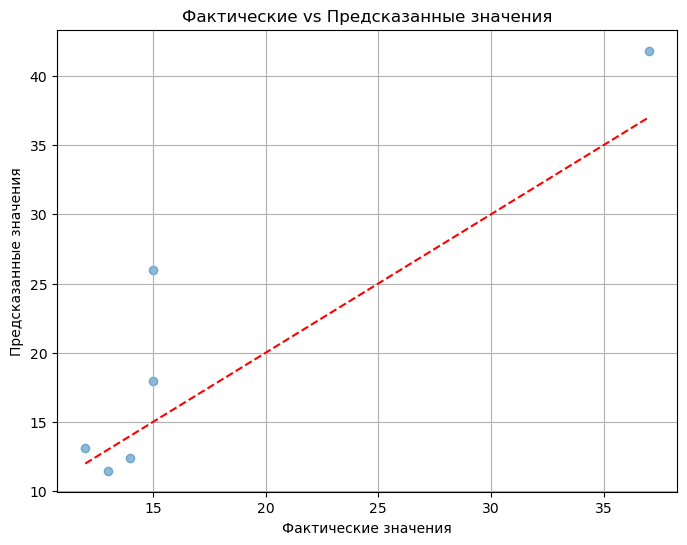

In [46]:
pt.figure(figsize=(8, 6))
pt.scatter(y_test, y_pred, alpha=0.5)
pt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
pt.xlabel('Фактические значения')
pt.ylabel('Предсказанные значения')
pt.title('Фактические vs Предсказанные значения')
pt.grid()
pt.show()

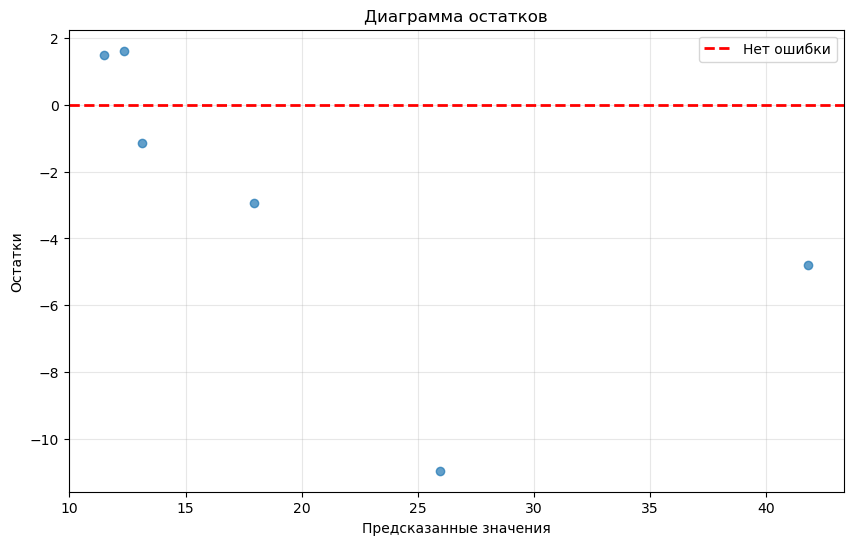

In [47]:
residuals = y_test - y_pred

pt.figure(figsize=(10, 6))
pt.scatter(y_pred, residuals, alpha=0.7)
pt.axhline(y=0, color='red', linestyle='--', linewidth=2, label = 'Нет ошибки')
pt.xlabel('Предсказанные значения')
pt.ylabel('Остатки')
pt.title('Диаграмма остатков')
pt.legend()
pt.grid(True, alpha=0.3)
pt.show()

Результат:
Плохо: Недостаточное количество данных в исходной выборке, чтобы корректно проверить правильную работу предсказывания значений
Хорошо: По метрикам данная модель считается "хорошо" обученной. Но опять же, это из-за малого количества исходных значений. При их увеличении также и поменяются метрики.
